In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib 
import mplleaflet
data = pd.read_csv('activity_names.csv')
locations = pd.read_csv('Subway Entrances.csv')
data['Stop Name'] = data['Stop Name'].apply(lambda x: x.lower())
locations['Stop Name'] = locations['Stop Name'].apply(lambda x: x.lower())
data = data.loc[:,'Stop Name':'DAILY_ENTRIES']
entries = data.groupby(['Stop Name'],  as_index=False).sum()
entries = entries[entries.columns[::-1]]
entries = entries.merge(locations, on = ['Stop Name'])
stops = entries[entries['ENTRIES'].notnull()]
stops.to_csv('Subway Entrances1.csv')

In [85]:

census = gpd.read_file("2010gendercensus.geojson")
entrances = gpd.read_file("Subway Entrances.geojson")



/Users/chelan/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:381: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


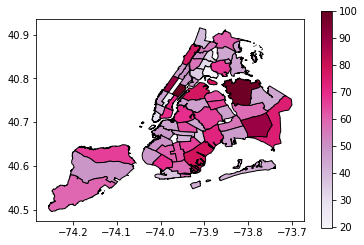

In [86]:
base = census.plot(column = '% of Max', colormap = "PuRd", edgecolor='black', legend = "True")

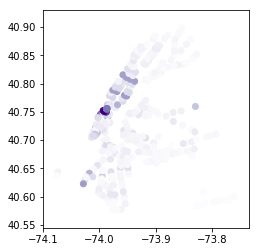

In [90]:
entrances.plot(column = 'DAILY_ENTRIES', cmap = 'Purples')

In [93]:
ax = entrances.plot(ax=base, alpha = 0.8, cmap = 'Purples', markersize = 1000)
mplleaflet.show(fig=ax.figure, crs=census.crs, tiles='cartodb_positron')